In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


###project



In [ ]:
df=pd.read_csv('/content/cities.csv')
df.head()

,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State,average,date
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,37.333333,1748-06-01
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,47.500000,1748-07-01
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,54.333333,1748-08-01
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,31.500000,1748-09-01
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,45.666667,1748-10-01


In [ ]:
df.to_html('cities.html')

In [ ]:
df.dtypes

LatD         int64
LatM         int64
LatS         int64
NS          object
LonD         int64
LonM         int64
LonS         int64
EW          object
City        object
State       object
average    float64
date        object
dtype: object

LatD       0
LatM       0
LatS       0
NS         0
LonD       0
LonM       0
LonS       0
EW         0
City       0
State      0
average    0
date       0
dtype: int64

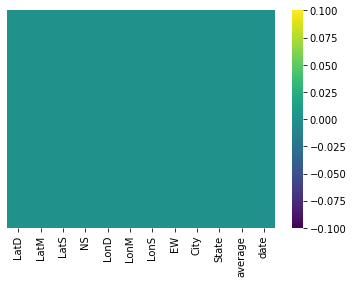

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')
df.isnull().sum()


In [ ]:
df=df.dropna(how='any',axis=0)
df.shape

(128, 12)

In [ ]:
df.rename(columns={'LatD':'Latitude in Degree','LatM':'Latitude in Minute','LatS':'Latitude in Second','LonD':'Longitude in Degree','LonM':'Longitude in Minute','LonS':'Longitude in Second','NS':'North-South','EW':'East-West','average':'Average'},inplace=True)

In [ ]:
df.head()

,Latitude in Degree,Latitude in Minute,Latitude in Second,North-South,Longitude in Degree,Longitude in Minute,Longitude in Second,East-West,City,State,Average,date
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,37.333333,1748-06-01
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,47.500000,1748-07-01
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,54.333333,1748-08-01
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,31.500000,1748-09-01
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,45.666667,1748-10-01


In [ ]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.index

DatetimeIndex(['1748-06-01', '1748-07-01', '1748-08-01', '1748-09-01',
               '1748-10-01', '1748-11-01', '1748-12-01', '1749-01-01',
               '1749-02-01', '1749-03-01',
               ...
               '1758-04-01', '1758-05-01', '1758-06-01', '1758-07-01',
               '1758-08-01', '1758-09-01', '1758-10-01', '1758-11-01',
               '1758-12-01', '1759-01-01'],
              dtype='datetime64[ns]', name='date', length=128, freq=None)

In [ ]:
df.describe()

,Latitude in Degree,Latitude in Minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second,Average
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,38.820312,30.765625,27.492188,93.250000,27.742188,26.960938,40.641785
std,5.200596,16.426158,18.977814,15.466499,16.927937,18.727807,1.834970
min,26.000000,1.000000,0.000000,71.000000,0.000000,0.000000,31.500000
25%,35.000000,16.000000,11.000000,80.000000,14.000000,11.000000,40.579828
50%,39.000000,31.000000,24.000000,89.500000,26.500000,23.500000,40.581119
75%,42.250000,45.000000,47.000000,103.250000,40.250000,47.000000,40.582258
max,50.000000,59.000000,59.000000,123.000000,58.000000,59.000000,54.333333


In [ ]:
df['year']=df.index.year
df.head()

,Latitude in Degree,Latitude in Minute,Latitude in Second,North-South,Longitude in Degree,Longitude in Minute,Longitude in Second,East-West,City,State,Average,year
date,,,,,,,,,,,,
1748-06-01,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,37.333333,1748
1748-07-01,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,47.500000,1748
1748-08-01,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,54.333333,1748
1748-09-01,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,31.500000,1748
1748-10-01,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,45.666667,1748


In [ ]:
x=df[['Latitude in Degree','Latitude in Minute','Latitude in Second','Longitude in Degree','Longitude in Minute','Longitude in Second']]
y=df.Average

In [ ]:
x

,Latitude in Degree,Latitude in Minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second
date,,,,,,
1748-06-01,41,5,59,80,39,0
1748-07-01,42,52,48,97,23,23
1748-08-01,46,35,59,120,30,36
1748-09-01,42,16,12,71,48,0
1748-10-01,43,37,48,89,46,11
...,...,...,...,...,...,...
1758-09-01,39,31,12,119,48,35
1758-10-01,50,25,11,104,39,0
1758-11-01,40,10,48,122,14,23


In [ ]:
y

date
1748-06-01    37.333333
1748-07-01    47.500000
1748-08-01    54.333333
1748-09-01    31.500000
1748-10-01    45.666667
                ...    
1758-09-01    40.581091
1758-10-01    40.581095
1758-11-01    40.581100
1758-12-01    40.581105
1759-01-01    40.581110
Name: Average, Length: 128, dtype: float64

In [ ]:
x.isnull()

,Latitude in Degree,Latitude in Minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second
date,,,,,,
1748-06-01,False,False,False,False,False,False
1748-07-01,False,False,False,False,False,False
1748-08-01,False,False,False,False,False,False
1748-09-01,False,False,False,False,False,False
1748-10-01,False,False,False,False,False,False
...,...,...,...,...,...,...
1758-09-01,False,False,False,False,False,False
1758-10-01,False,False,False,False,False,False
1758-11-01,False,False,False,False,False,False


In [ ]:
y.isnull()

date
1748-06-01    False
1748-07-01    False
1748-08-01    False
1748-09-01    False
1748-10-01    False
              ...  
1758-09-01    False
1758-10-01    False
1758-11-01    False
1758-12-01    False
1759-01-01    False
Name: Average, Length: 128, dtype: bool

In [ ]:

df2=df.drop(["City","State","North-South","East-West"],axis=1)
df2= df2.reset_index()

In [ ]:
df2

,date,Latitude in Degree,Latitude in Minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second,Average,year
0,1748-06-01,41,5,59,80,39,0,37.333333,1748
1,1748-07-01,42,52,48,97,23,23,47.500000,1748
2,1748-08-01,46,35,59,120,30,36,54.333333,1748
3,1748-09-01,42,16,12,71,48,0,31.500000,1748
4,1748-10-01,43,37,48,89,46,11,45.666667,1748
...,...,...,...,...,...,...,...,...,...
123,1758-09-01,39,31,12,119,48,35,40.581091,1758
124,1758-10-01,50,25,11,104,39,0,40.581095,1758
125,1758-11-01,40,10,48,122,14,23,40.581100,1758
126,1758-12-01,40,19,48,75,55,48,40.581105,1758


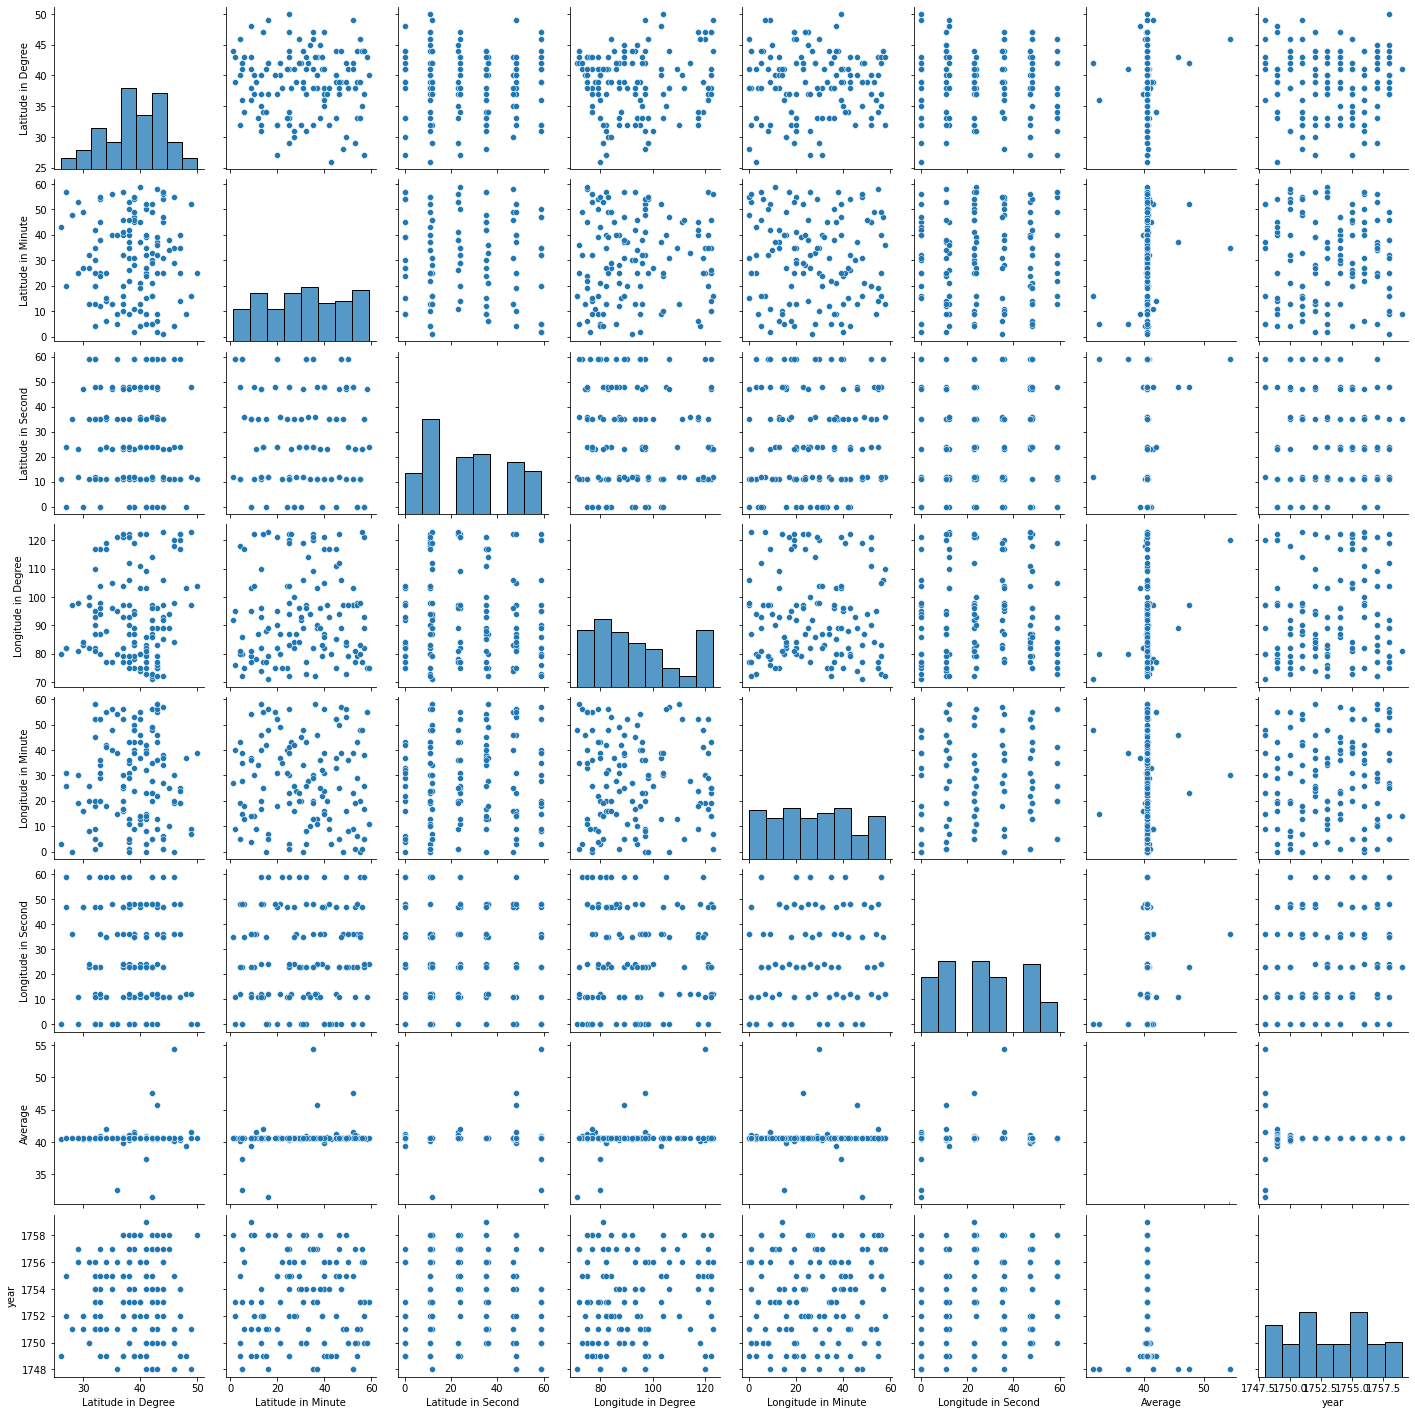

In [ ]:
sns.pairplot(df2)

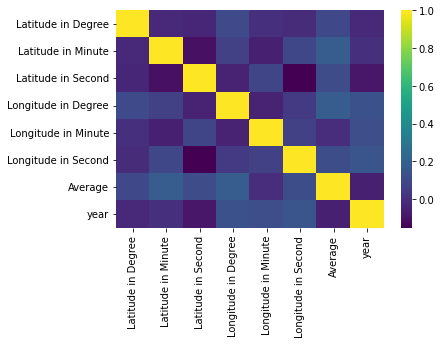

In [ ]:
g=df.corr()
sns.heatmap(g,yticklabels=True,cbar=True,cmap='viridis')

In [ ]:
df.describe()

,Latitude in Degree,Latitude in Minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second,Average,year
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,38.820312,30.765625,27.492188,93.250000,27.742188,26.960938,40.641785,1753.242188
std,5.200596,16.426158,18.977814,15.466499,16.927937,18.727807,1.834970,3.103836
min,26.000000,1.000000,0.000000,71.000000,0.000000,0.000000,31.500000,1748.000000
25%,35.000000,16.000000,11.000000,80.000000,14.000000,11.000000,40.579828,1751.000000
50%,39.000000,31.000000,24.000000,89.500000,26.500000,23.500000,40.581119,1753.000000
75%,42.250000,45.000000,47.000000,103.250000,40.250000,47.000000,40.582258,1756.000000
max,50.000000,59.000000,59.000000,123.000000,58.000000,59.000000,54.333333,1759.000000


extratree regression


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
x.head()

,Latitude in Degree,Latitude in Minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second
date,,,,,,
1748-06-01,41,5,59,80,39,0
1748-07-01,42,52,48,97,23,23
1748-08-01,46,35,59,120,30,36
1748-09-01,42,16,12,71,48,0
1748-10-01,43,37,48,89,46,11


In [ ]:
print(model.feature_importances_)

[0.17796039 0.12400385 0.13097638 0.2645806  0.14551473 0.15696405]


<function matplotlib.pyplot.show>

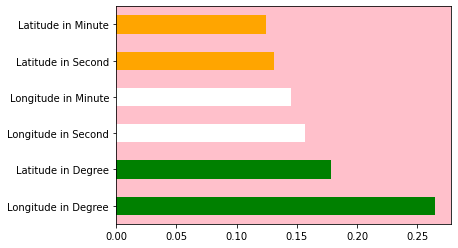

In [ ]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
c=["green","green","white","white","orange","orange"]
feat_importances.nlargest(6).plot(kind='barh',color=c,cmap='viridis')
ax=plt.axes()
ax.set_facecolor("pink")
plt.show

In [ ]:
y

date
1748-06-01    37.333333
1748-07-01    47.500000
1748-08-01    54.333333
1748-09-01    31.500000
1748-10-01    45.666667
                ...    
1758-09-01    40.581091
1758-10-01    40.581095
1758-11-01    40.581100
1758-12-01    40.581105
1759-01-01    40.581110
Name: Average, Length: 128, dtype: float64

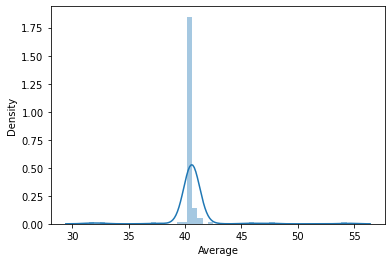

In [ ]:
sns.distplot(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([0.03055596, 0.02184618, 0.00123149, 0.00691909, 0.00223556,
       0.00499106])

In [ ]:
regressor.intercept_

37.845218098484196

In [ ]:
print('Coefficient of determination of R^2<--on train set:{}'.format(regressor.score(x_train,y_train)))


Coefficient of determination of R^2<--on train set:0.09732344120950742


In [ ]:
print('Coefficient of determination of R^2<--on test set:{}'.format(regressor.score(x_test,y_test)))

Coefficient of determination of R^2<--on test set:0.04760004845976662


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [ ]:
score.mean()

-86896420.43803512

In [ ]:

coeff_df=pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Latitude in Degree,0.030556
Latitude in Minute,0.021846
Latitude in Second,0.001231
Longitude in Degree,0.006919
Longitude in Minute,0.002236
Longitude in Second,0.004991


In [ ]:
prediction=regressor.predict(x_test)

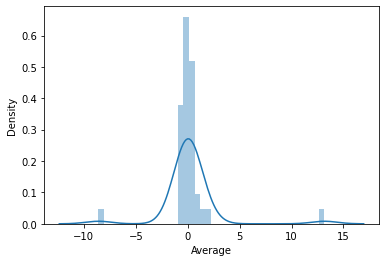

In [ ]:
sns.distplot(y_test-prediction)

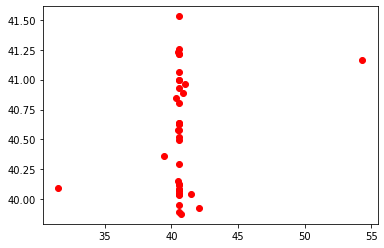

In [ ]:
plt.scatter(y_test,prediction,color='red')

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1.0127781714544957
MSE: 6.721438773216321
RMSE: 2.5925737739197166


In [ ]:
import pickle

In [ ]:
file=open('regression_model.pkl','wb')
pickle.dump(regressor,file)

## decisiontree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree=DecisionTreeRegressor(criterion='mse')

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse')

In [ ]:
print('coefficient of determination R^2 <-- on the train set: {}'.format(dtree.score(x_train,y_train)))

coefficient of determination R^2 <-- on the train set: 1.0


In [ ]:
print('coefficient of determination R^2 <-- on the test set: {}'.format(dtree.score(x_test,y_test)))

coefficient of determination R^2 <-- on the test set: -0.09286172479965771


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,x,y,cv=5)

In [ ]:
score.mean()

-514420454.62740195

In [ ]:
from sklearn.tree import plot_tree

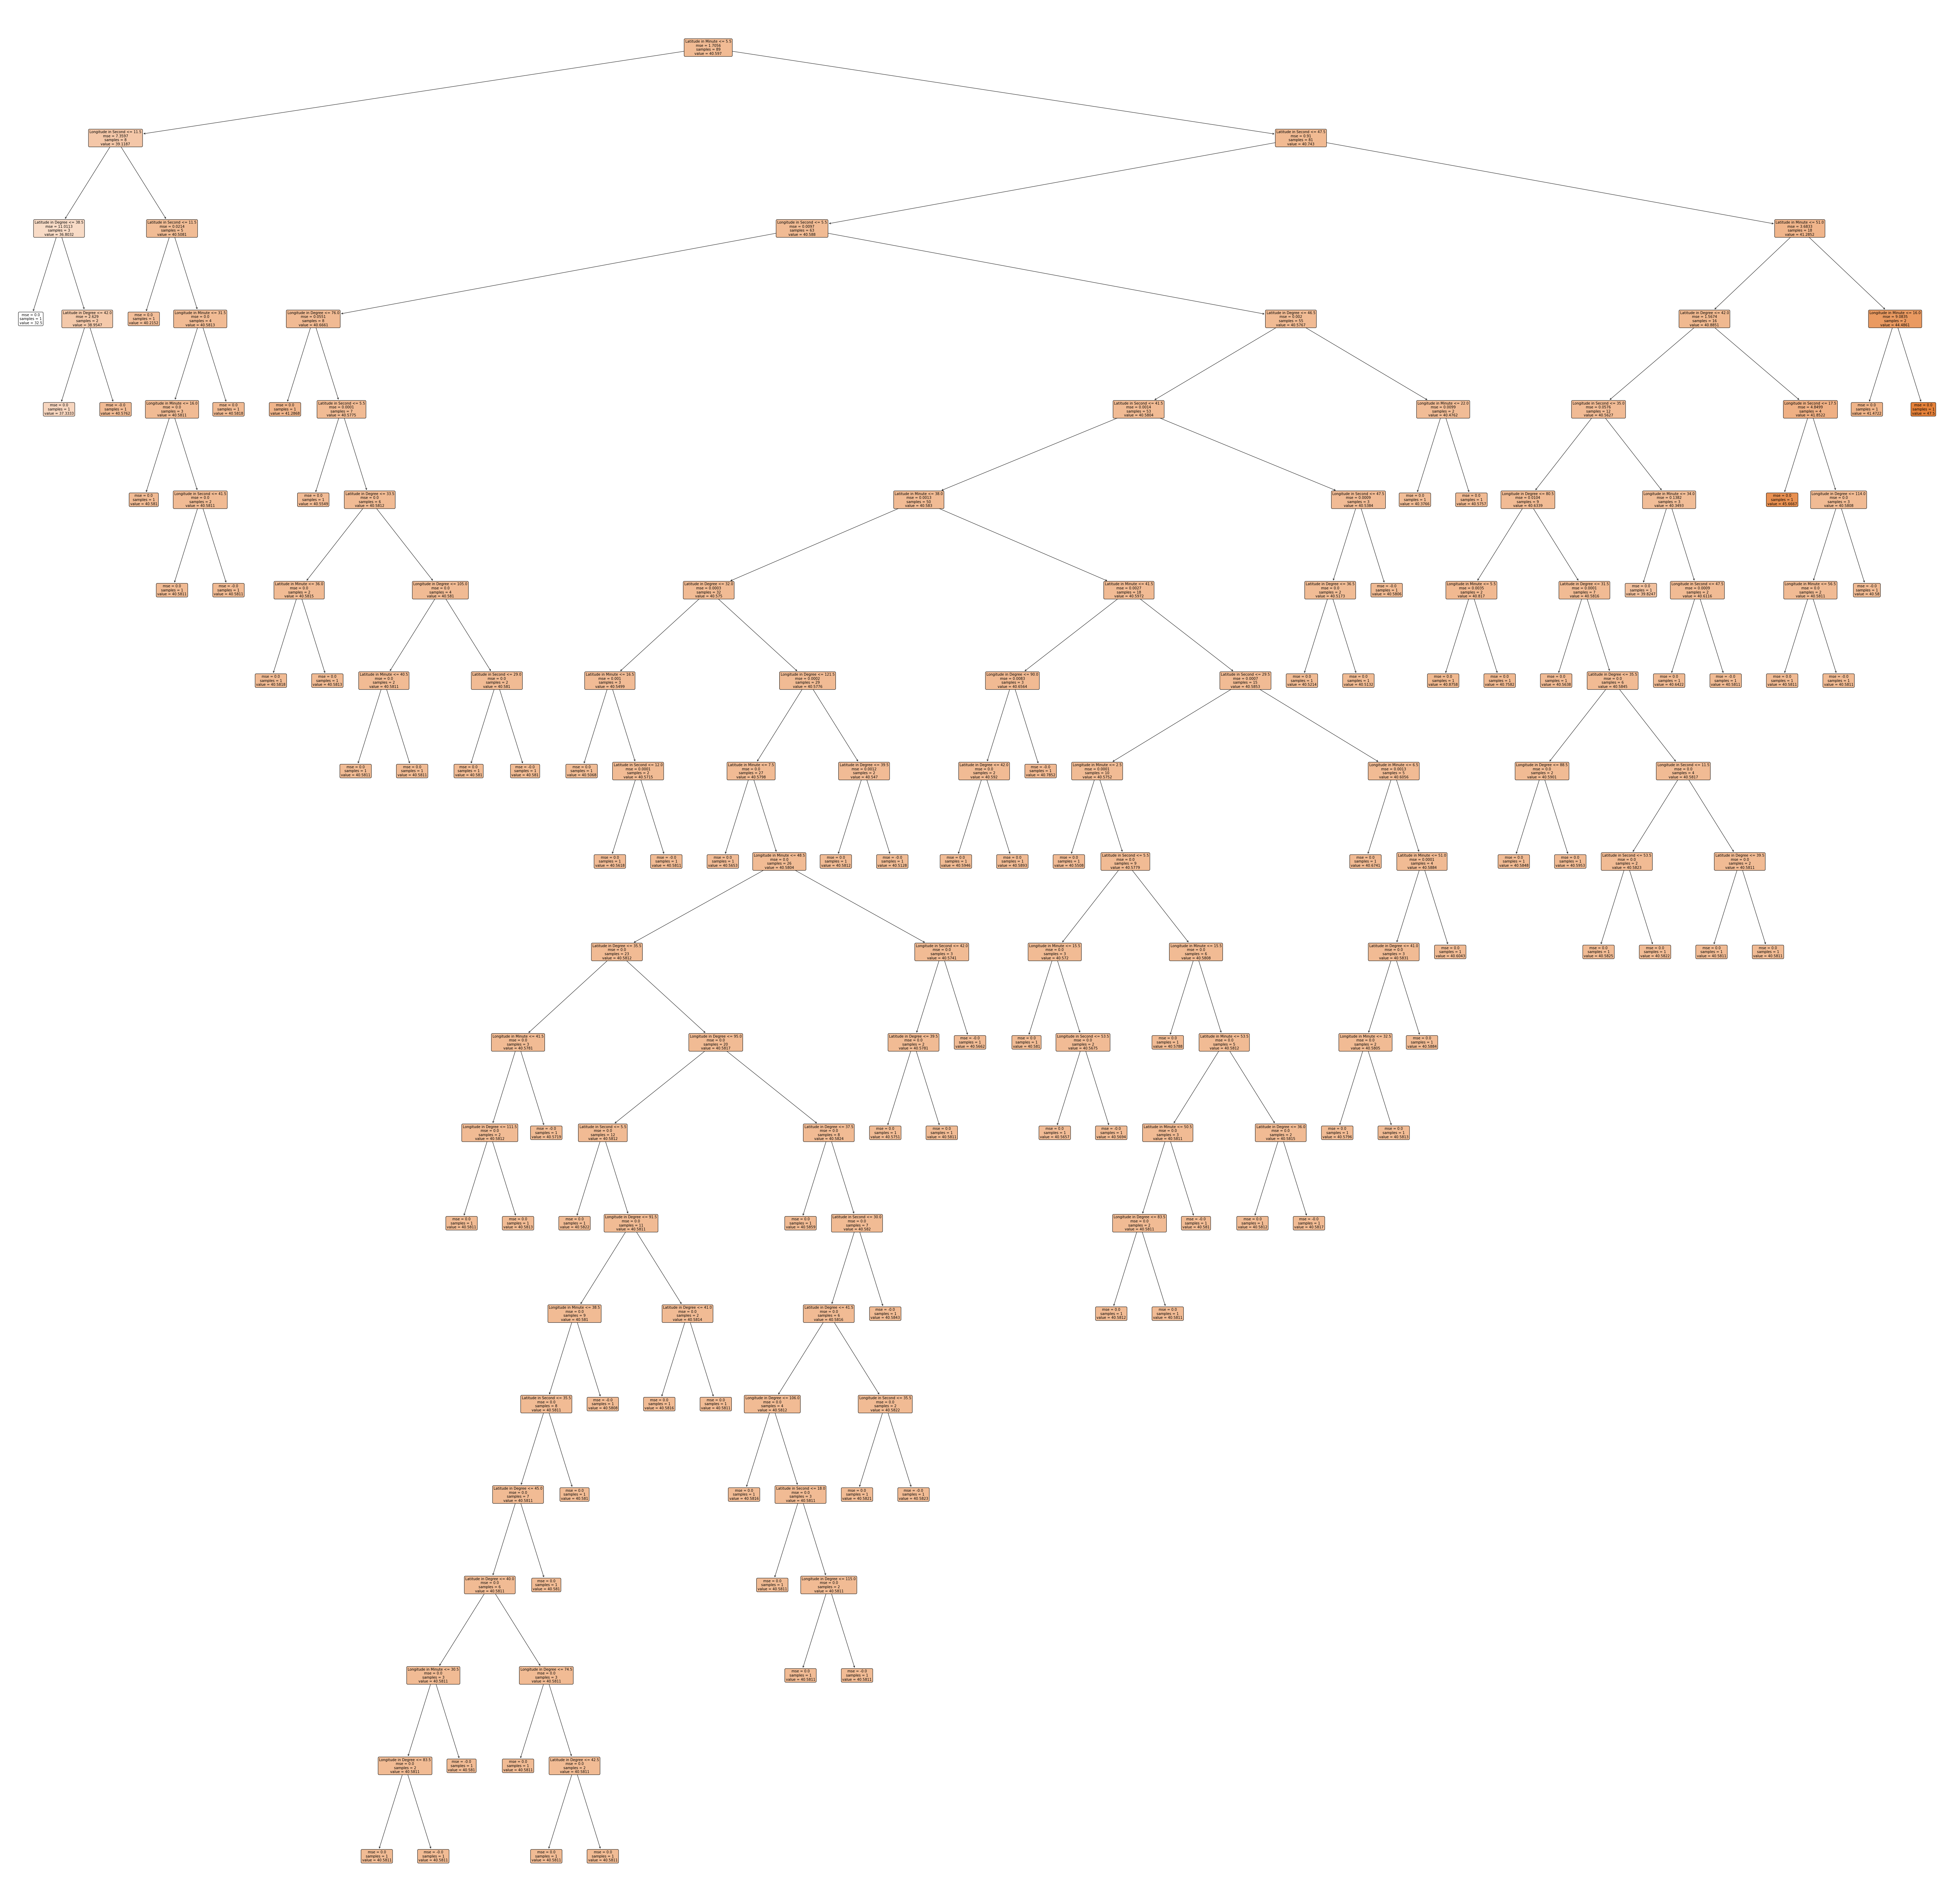

In [ ]:
plt.figure(figsize=(100,100))
decision_tree=plot_tree(decision_tree=dtree,
                        feature_names=x.columns,
                        filled=True,
                        precision=4,
                        rounded=True)

# model evaluation

In [ ]:
prediction=dtree.predict(x_test)

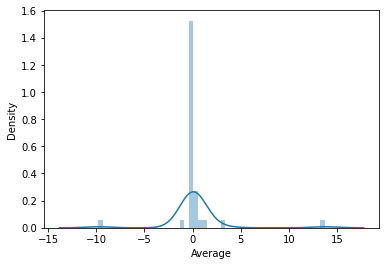

In [ ]:
sns.distplot(y_test-prediction)

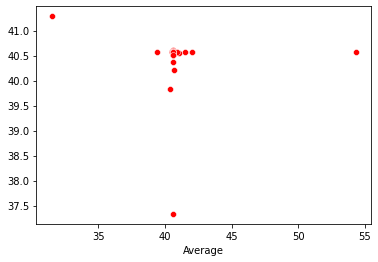

In [ ]:
sns.scatterplot(y_test,prediction,color='red')

In [ ]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [ ]:
params={
    "splitter"  :  ["best", "random"],
    "max_depth":[2,3,5,7,9,10,12,15],
    "min_samples_leaf" :[1,2,3,4,5], 
    "min_weight_fraction_leaf" :[0.1,0.2,0.3,0.4],
    "max_features" : ["auto","log2","sqrt",None],
    "max_leaf_nodes" :[None,10,20,30,40,50,60,70]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [ ]:
def timer(start_time=None):
  if not start_time:
    start_time=datetime.now()
    return start_time
  elif start_time:
    thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
    tmin,tsec=divmod(temp_sec,60)
    print('\nTime Taken :%i hours %i minutes and %s seconds'%(thour,tmin,round(tsec,2)))  

In [ ]:
from datetime import datetime

In [ ]:
start_time=timer(None)
random_search.fit(x,y)
timer(start_time)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

Time Taken :0 hours 8 minutes and 38.54 seconds


In [ ]:
random_search.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.4,
 'splitter': 'random'}

In [ ]:
random_search.best_score_

-3.291044326993267

In [ ]:
prediction=random_search.predict(x_test)

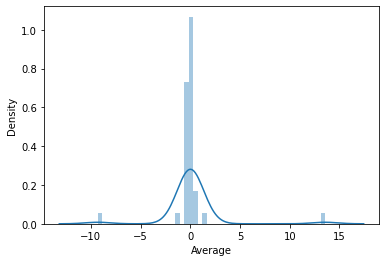

In [ ]:
sns.distplot(y_test-prediction)

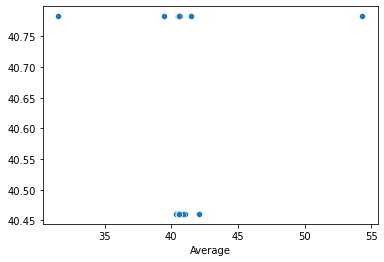

In [ ]:
sns.scatterplot(y_test,prediction)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 0.8281417059300037
MSE: 7.07628616359098
RMSE: 2.6601289749918107


In [ ]:
file=open('decision_regression_model.pkl','wb')
pickle.dump(random_search,file)

# train test split

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg=RandomForestRegressor(criterion='mse')

In [ ]:
reg.fit(x_train,y_train)

RandomForestRegressor(criterion='mse')

In [ ]:
print('coefficient of determination R^2 <-- on the train set: {}'.format(reg.score(x_train,y_train)))

coefficient of determination R^2 <-- on the train set: 0.8145722950097061


In [ ]:
print('coefficient of determination R^2 <-- on the test set: {}'.format(reg.score(x_test,y_test)))

coefficient of determination R^2 <-- on the test set: -0.033494462035909


In [ ]:
score1=cross_val_score(reg,x,y,cv=5)

In [ ]:
score.mean()

-514420454.62740195

In [ ]:
prediction=reg.predict(x_test)

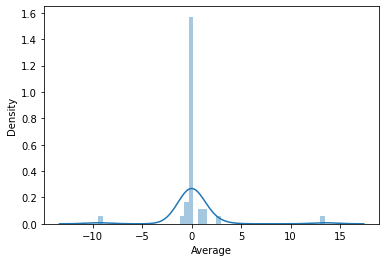

In [ ]:
sns.distplot(y_test-prediction)

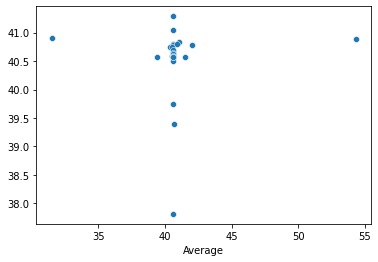

In [ ]:
sns.scatterplot(y_test,prediction)

# hyperparameter tuning

In [ ]:
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=50,stop=130,num=25)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=10)]
min_samples_split=[3,8,10,25,50]
min_samples_leaf=[2,5,8,10]
bootstrap=[True,False]

In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth, 
    'min_samples_split':min_samples_split, 
    'min_samples_leaf':min_samples_leaf,  
    'max_features':max_features,
    'bootstrap':bootstrap
    
}
print(random_grid)

{'n_estimators': [50, 53, 56, 60, 63, 66, 70, 73, 76, 80, 83, 86, 90, 93, 96, 100, 103, 106, 110, 113, 116, 120, 123, 126, 130], 'max_depth': [5, 7, 10, 13, 16, 18, 21, 24, 27, 30], 'min_samples_split': [3, 8, 10, 25, 50], 'min_samples_leaf': [2, 5, 8, 10], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]}


In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=130,cv=5,verbose=2,random_state=42)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.1s
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.1s
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.1s
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.1s
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=50, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=50, n_estimators=83; t

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=130,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8, 10],
                                        'min_samples_split': [3, 8, 10, 25, 50],
                                        'n_estimators': [50, 53, 56, 60, 63, 66,
                                                         70, 73, 76, 80, 83, 86,
                                                         90, 93, 96, 100, 103,
                                                         106, 110, 113, 116,
                                                         120, 123, 126, 130]},
                   random_state=42, scoring='neg_mean_squared_error',
                

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 21,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 50,
 'n_estimators': 126}

In [ ]:
rf_random.best_score_

-1.6875439013209839

In [ ]:
prediction=rf_random.predict(x_test)

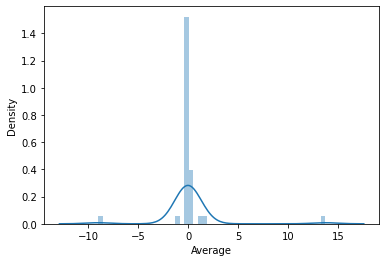

In [ ]:
sns.distplot(y_test-prediction)

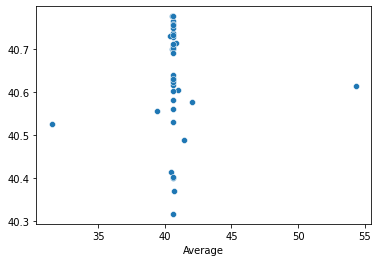

In [ ]:
sns.scatterplot(y_test,prediction)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 0.79716491835976
MSE: 7.054360558928381
RMSE: 2.6560046232882164


In [ ]:
import pickle
file=open('random_forest_regression_model1.pkl','wb')
pickle.dump(rf_random,file)
file.close()

# xgboost regressor

In [ ]:
import xgboost as xgb

In [ ]:
regressor=xgb.XGBRegressor()
regressor.fit(x_train,y_train)

[16:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9667293358899864


In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on test set: -0.10598907340037922


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)   

[16:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
score.mean()

-191351398.95846096

In [ ]:
prediction=regressor.predict(x_test)

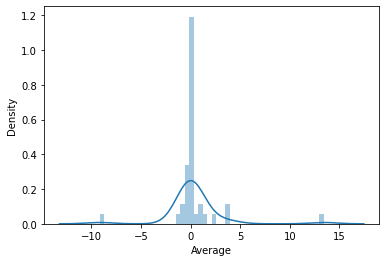

In [ ]:
sns.distplot(y_test-prediction)

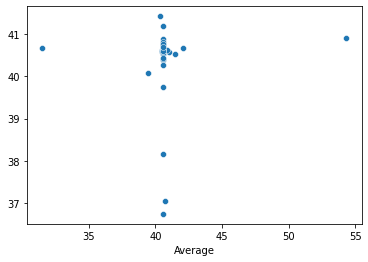

In [ ]:
sns.scatterplot(y_test,prediction)

## hypertuning

In [ ]:
xgb.XGBRegressor()

XGBRegressor()

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=50,stop=130,num=25)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=10)]
min_samples_split=[3,8,10,25,50]
min_samples_leaf=[2,5,8,10]
bootstrap=[True,False]

In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth, 
    'min_samples_split':min_samples_split, 
    'min_samples_leaf':min_samples_leaf,  
    'max_features':max_features,
    'bootstrap':bootstrap
    
}
print(random_grid)

{'n_estimators': [50, 53, 56, 60, 63, 66, 70, 73, 76, 80, 83, 86, 90, 93, 96, 100, 103, 106, 110, 113, 116, 120, 123, 126, 130], 'max_depth': [5, 7, 10, 13, 16, 18, 21, 24, 27, 30], 'min_samples_split': [3, 8, 10, 25, 50], 'min_samples_leaf': [2, 5, 8, 10], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]}


In [ ]:
rf=xgb.XGBRegressor()

In [ ]:
xg_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=130,cv=5,verbose=2,random_state=42)

In [ ]:
xg_random.fit(x_train,y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits
[16:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.1s
[16:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.0s
[16:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=116; total time=   0.0s
[16:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END bootstrap

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=130,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8, 10],
                                        'min_samples_split': [3, 8, 10, 25, 50],
                                        'n_estimators': [50, 53, 56, 60, 63, 66,
                                                         70, 73, 76, 80, 83, 86,
                                                         90, 93, 96, 100, 103,
                                                         106, 110, 113, 116,
                                                         120, 123, 126, 130]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbos

In [ ]:
xg_random.best_params_

{'bootstrap': False,
 'max_depth': 21,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 50,
 'n_estimators': 50}

In [ ]:
xg_random.best_score_

-3.041562424314666

In [ ]:
predictions=xg_random.predict(x_test)

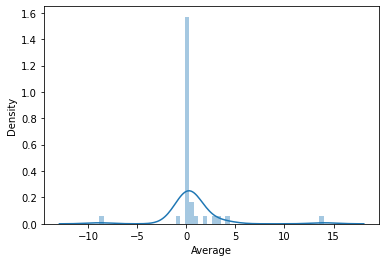

In [ ]:
sns.distplot(y_test-predictions)

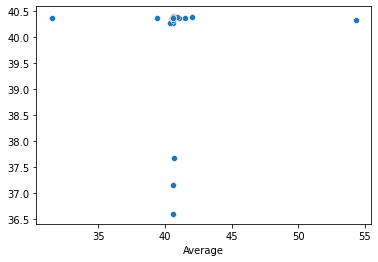

In [ ]:
sns.scatterplot(y_test,predictions)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.1303401834372497
MSE: 8.158338875248292
RMSE: 2.85628060163008


In [ ]:
import pickle

In [ ]:
file=open('XGBOOST_Regressor_model.pkl','wb')
pickle.dump(xg_random,file)

In [ ]:
latest_df=df.loc['1754':'1759']
latest_df.head()

,Latitude in Degree,Latitude in Minute,Latitude in Second,North-South,Longitude in Degree,Longitude in Minute,Longitude in Second,East-West,City,State,Average,year
date,,,,,,,,,,,,
1754-01-01,39,47,59,"""N""",89,39,0,"""W""","""Springfield""",IL,40.582213,1754
1754-02-01,47,40,11,"""N""",117,24,36,"""W""","""Spokane""",WA,40.582497,1754
1754-03-01,41,40,48,"""N""",86,15,0,"""W""","""South Bend""",IN,40.582475,1754
1754-04-01,43,32,24,"""N""",96,43,48,"""W""","""Sioux Falls""",SD,40.582339,1754
1754-05-01,42,29,24,"""N""",96,23,23,"""W""","""Sioux City""",IA,40.582072,1754


In [ ]:
latest_df.describe()

,Latitude in Degree,Latitude in Minute,Latitude in Second,Longitude in Degree,Longitude in Minute,Longitude in Second,Average,year
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,38.786885,31.770492,27.196721,96.786885,30.573770,29.360656,40.581162,1756.049180
std,4.936648,14.228368,16.265321,16.143228,17.533263,19.517542,0.000477,1.465449
min,27.000000,1.000000,0.000000,72.000000,0.000000,0.000000,40.579626,1754.000000
25%,35.000000,24.000000,12.000000,83.000000,15.000000,11.000000,40.581076,1755.000000
50%,39.000000,32.000000,24.000000,94.000000,31.000000,24.000000,40.581115,1756.000000
75%,42.000000,42.000000,36.000000,111.000000,43.000000,47.000000,40.581214,1757.000000
max,50.000000,57.000000,59.000000,123.000000,58.000000,59.000000,40.582497,1759.000000


In [ ]:
latest_df[['City','Average']].groupby(['City']).mean().sort_values('Average')

,Average
City,
"""Sedalia""",40.579626
"""Selma""",40.579895
"""Seattle""",40.580036
"""Seminole""",40.580582
"""Scranton""",40.580765
"""Salida""",40.580962
"""Salina""",40.580968
"""Scottsbluff""",40.580968
"""Salem""",40.580977


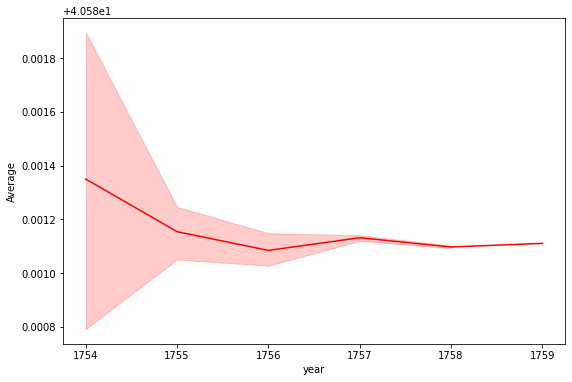

In [ ]:
plt.figure(figsize=(9,6))
sns.lineplot(x='year',y='Average',data=latest_df,color='red')
plt.show()

In [ ]:
resample_df=latest_df[['Average']].resample('A').mean()
resample_df.head()

,Average
date,
1754-12-31,40.581350
1755-12-31,40.581154
1756-12-31,40.581084
1757-12-31,40.581131
1758-12-31,40.581097


In [ ]:
df[['City','Average']].groupby(['City']).mean().sort_values('Average')

,Average
City,
"""Worcester""",31.500000
"""Winston-Salem""",32.500000
"""Youngstown""",37.333333
"""Williston""",39.423064
"""Williamson""",39.824683
...,...
"""Winnipeg""",41.472222
"""Wilmington""",41.675170
"""Wisconsin Dells""",45.666667


findfont: Font family ['FANTACY'] not found. Falling back to DejaVu Sans.


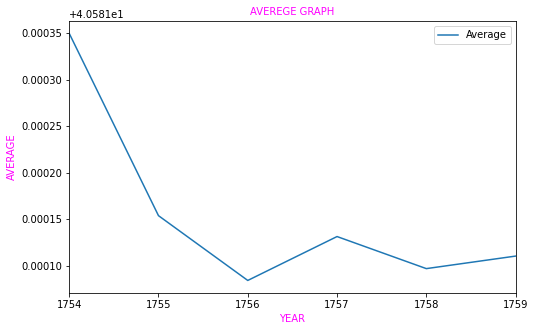

In [ ]:
resample_df.plot(figsize=(8,5))
font={'family':'FANTACY','color':'magenta','size':10} 
plt.xlabel('YEAR',font)
plt.ylabel('AVERAGE',font)
plt.title('AVEREGE GRAPH',font)
plt.legend()


In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Ducky Fuller Test Results')
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['test statistic','p-value','Lags used','Number of ovservation used'])
for key,value in test_df[4].items():
  df_output['critical value (%s)'%key]=value
print(df_output)   

Ducky Fuller Test Results
test statistic               -7.106106e+00
p-value                       4.049884e-10
Lags used                     0.000000e+00
Number of ovservation used    5.000000e+00
critical value (1%)          -6.045114e+00
critical value (5%)          -3.929280e+00
critical value (10%)         -2.986810e+00
dtype: float64


In [ ]:
decomp=seasonal_decompose(resample_df,freq=3)
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

<Figure size 432x360 with 0 Axes>

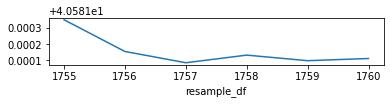

<Figure size 432x360 with 0 Axes>

In [ ]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('resample_df')
plt.figure(figsize=(6,5))

<Figure size 432x360 with 0 Axes>

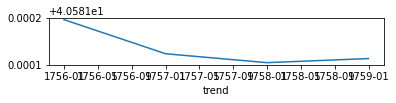

<Figure size 432x360 with 0 Axes>

In [ ]:
plt.subplot(412)
plt.plot(trend)
plt.xlabel('trend')
plt.figure(figsize=(6,5))

<Figure size 432x360 with 0 Axes>

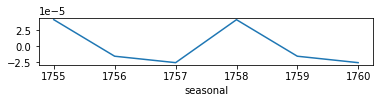

<Figure size 432x360 with 0 Axes>

In [ ]:
plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('seasonal')
plt.figure(figsize=(6,5))

<Figure size 432x360 with 0 Axes>

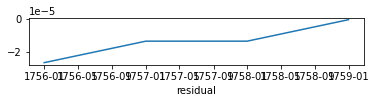

<Figure size 432x360 with 0 Axes>

In [ ]:
plt.subplot(414)
plt.plot(residual)
plt.xlabel('residual')
plt.figure(figsize=(6,5))

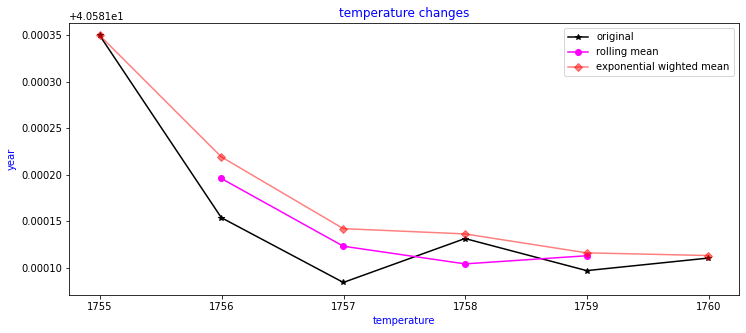

In [ ]:
rol_mean=resample_df.rolling(window=3,center=True).mean()
ewm=resample_df.ewm(span=3).mean()
rol_std=resample_df.rolling(window=3,center=True).std()
fig,(ax1)=plt.subplots(figsize=(12,5))
ax1.plot(resample_df,label='original',color='black',marker='*')
ax1.plot(rol_mean,label='rolling mean',color='magenta',marker='o')
ax1.plot(ewm,label='exponential wighted mean',color='red',alpha=0.5,marker='D')
ax1.set_title('temperature changes',fontsize=12,color='blue')
ax1.set_xlabel('temperature',fontsize=10,color='blue')
ax1.set_ylabel('year',fontsize=10,color='blue')
plt.legend()

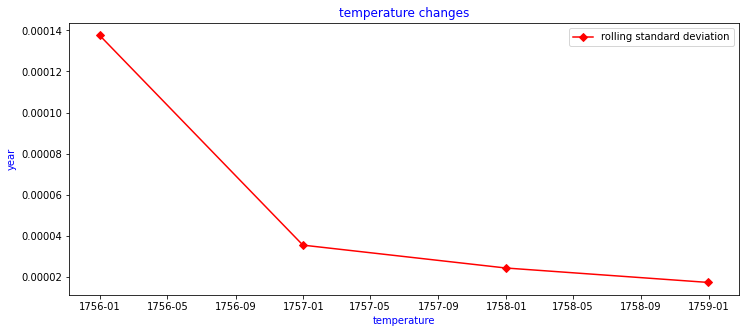

In [ ]:

fig,(ax2)=plt.subplots(figsize=(12,5))
ax2.plot(rol_std,label='rolling standard deviation',color='red',marker='D')
ax2.set_title('temperature changes',fontsize=12,color='blue')
ax2.set_xlabel('temperature',fontsize=10,color='blue')
ax2.set_ylabel('year',fontsize=10,color='blue')
plt.legend()


In [ ]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)
print('Ducky fuller test for the rolling mean')
df_test=adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistics','p-value','Lags used','Number of observation used'])
for key,value in df_test[4].items():
  df_output['critical value (%s)'%key]=value
print(df_output)
print()
print('Ducky fuller test for the ewm')
df_test=adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistics','p-value','Lags used','Number of observation used'])
for key,value in df_test[4].items():
  df_output['critical value (%s)'%key]=value
print(df_output)




Ducky fuller test for the rolling mean
Test Statistics              -6.916875e+00
p-value                       1.173323e-09
Lags used                     0.000000e+00
Number of observation used    3.000000e+00
critical value (1%)          -1.041719e+01
critical value (5%)          -5.778381e+00
critical value (10%)         -3.391681e+00
dtype: float64

Ducky fuller test for the ewm
Test Statistics              -5.437440
p-value                       0.000003
Lags used                     1.000000
Number of observation used    4.000000
critical value (1%)          -7.355441
critical value (5%)          -4.474365
critical value (10%)         -3.126933
dtype: float64


In [ ]:
diff_rol_mean=resample_df-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Average
date,
1755-12-31,-0.000042
1756-12-31,-0.000039
1757-12-31,0.000027
1758-12-31,-0.000016


In [ ]:
diff_ewm=resample_df-ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Average
date,
1754-12-31,0.000000
1755-12-31,-0.000065
1756-12-31,-0.000058
1757-12-31,-0.000005
1758-12-31,-0.000019


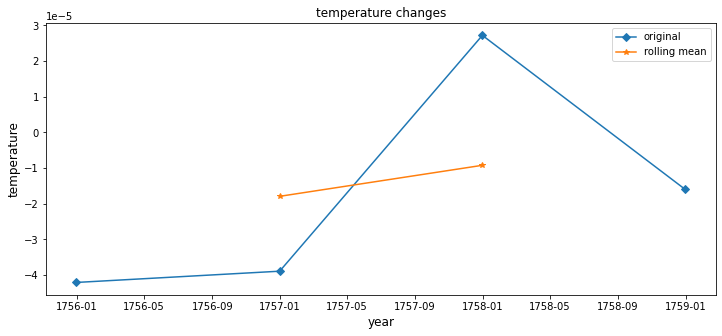

In [ ]:
df_rol_mean=diff_rol_mean.rolling(window=3,center=True).mean()
df_ewm=diff_ewm.ewm(span=3).mean()
fig,(ax1)=plt.subplots(figsize=(12,5))
ax1.plot(diff_rol_mean,label='original',marker='D')
ax1.plot(df_rol_mean,label='rolling mean',marker='*')
ax1.set_title('temperature changes')
ax1.set_xlabel('year',fontsize=12)
ax1.set_ylabel('temperature',fontsize=12)
plt.legend()

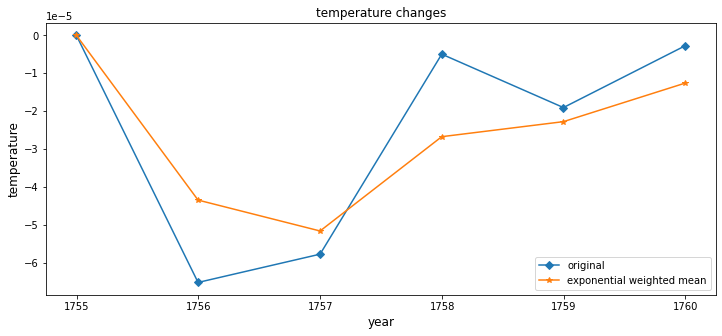

In [ ]:
fig,(ax2)=plt.subplots(figsize=(12,5))
ax2.plot(diff_ewm,label='original',marker='D')
ax2.plot(df_ewm,label='exponential weighted mean',marker='*')
ax2.set_title('temperature changes')
ax2.set_xlabel('year',fontsize=12)
ax2.set_ylabel('temperature',fontsize=12)
plt.legend()

In [ ]:
print('ducky fuller test for the difference between original and rolling mean')
dftest=adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test statistics','p-values','lags used','Number of observation used'])
for key,value in dftest[4].items():
  dfoutput['critical value (%s)' %key]=value
print(dfoutput)
print('')
print('ducky fuller test for the difference between original and exponential weighted mean')
dftest=adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['test statistics','p-values','lags used','Number of observation used'])
for key,value in dftest[4].items():
  dfoutput['critical value (%s)' %key]=value
print(dfoutput)     


ducky fuller test for the difference between original and rolling mean
Test statistics               -1.311073
p-values                       0.624091
lags used                      0.000000
Number of observation used     3.000000
critical value (1%)          -10.417191
critical value (5%)           -5.778381
critical value (10%)          -3.391681
dtype: float64

ducky fuller test for the difference between original and exponential weighted mean
test statistics               -1.311073
p-values                       0.624091
lags used                      0.000000
Number of observation used     3.000000
critical value (1%)          -10.417191
critical value (5%)           -5.778381
critical value (10%)          -3.391681
dtype: float64


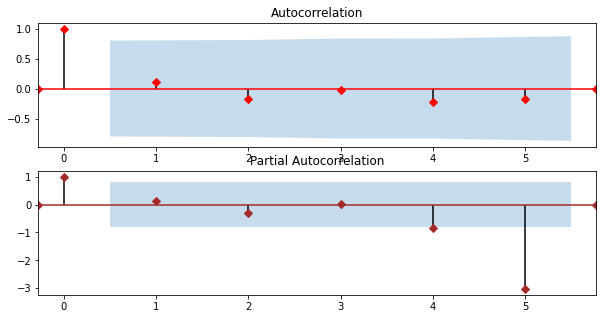

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df,ax=pyplot.gca(),color='red',marker='D')
pyplot.subplot(212)
plot_pacf(resample_df,ax=pyplot.gca(),color='brown',marker='D')
pyplot.show()